<a href="https://colab.research.google.com/github/vodindo/Financial-Inclusion-/blob/main/Independent_Project_Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project : Descriptive Statistics

**Financial Inclusion in East Africa**

**Research Question**





To establish the demographic factors that determine whether an individual has or uses a bank account. The variables that are significant either negatively or positively will be tested in determining their relationship with the dependent variable (has a bank account or not)

Metric for Success 

 1. Establishment of some of the key demographic factors that drives an individiual financial outcomes 
 2. Factors that determine financial inclusion in Kenya 
 3. Have a model with an acceptable level of accuracy prediction of those with(out) bank accounts.

Understanding the Context 

Access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

Recording the Experimental Design 

1. Loading the Dataset
2. Checking the shape, top, bottom and type of the dataset 
3. External data source validation 
4. Data cleaning 
5. Exploratory Data Analysis(EDA)
  a) Univariate EDA 
  b) Bivariate EDA - Analysis by country and demographic factors 
  c) Multivariate EDA

**Appropriatness of available data**

The data provided is considered appropriate as it contains the variables that are considered to perform the analysis

Importing the libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load datasets to be used for the EDA 

In [ ]:
#Load Dataset that describes the dataset.

Dataset = pd.read_csv('http://bit.ly/VariableDefinitions')
Dataset

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#Load the Financial Dataset and previewing the head 

FinancialDataset = pd.read_csv('http://bit.ly/FinancialDataset')
FinancialDataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# preview the bottom of the dataset
FinancialDataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:

FinancialDataset.columns = FinancialDataset.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Number of entries in each column, column data type

FinancialDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   has_a_bank_account      23488 non-null  object 
 4   type_of_location        23509 non-null  object 
 5   cell_phone_access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   the_relathip_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  level_of_educuation     23495 non-null  object 
 12  type_of_job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#Check for missing values.

FinancialDataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#Drop rows that contain any form of missing or null value that may result in inconsistencies 

FinancialDataset.dropna(inplace = True)

In [ ]:
#Confirm whether there is any null values. 

FinancialDataset.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [ ]:
#Drop irrelevant column(s)
FinancialDataset.drop(['uniqueid','year'], axis=1, inplace=True)
FinancialDataset

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#Checking for duplicates 
FinancialDataset.duplicated().sum()


4372

In [ ]:
# Drop the duplicates 
df1 = FinancialDataset.drop_duplicates()
df1

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


(18971, 11)
***********************
(18468, 11)


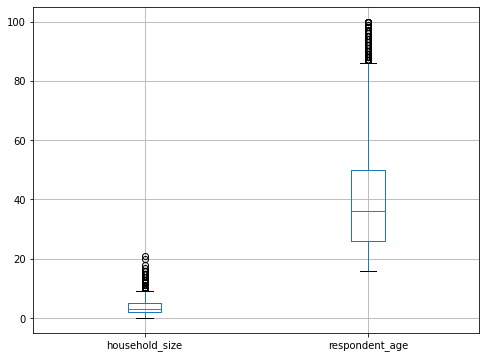

In [ ]:
# check for outliers 
df1.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(df1.shape)

print("***********************")

# remove the outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
print(df.shape)

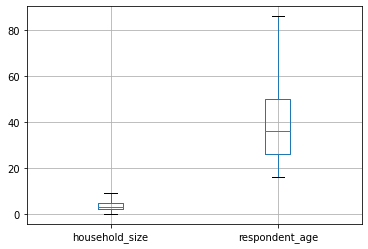

In [ ]:
# new data, without ouliers
df.boxplot()

In [ ]:
#Checking for the unique values that are in each column entry in the dataset?

for i in FinancialDataset.columns:
 print(FinancialDataset[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']


['Self employed' 'Governmen

In [ ]:

#Changing the data types to Category and the numerical columns remain as float64.

for column in FinancialDataset[FinancialDataset.columns.difference(['household_size', 'respondent_age'])].columns:
  FinancialDataset[column] = FinancialDataset[column].astype('category')
  
#Check the data types

FinancialDataset.dtypes

country                   category
has_a_bank_account        category
type_of_location          category
cell_phone_access         category
household_size             float64
respondent_age             float64
gender_of_respondent      category
the_relathip_with_head    category
marital_status            category
level_of_educuation       category
type_of_job               category
dtype: object

Univariate Analysis


In [ ]:
#Data Description 
FinancialDataset.describe()


,household_size,respondent_age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


Measure of Central Tendency 



In [ ]:
#Mean helps to find the number around which an entire information is spread out

print(FinancialDataset['household_size'].mean())
print(FinancialDataset['respondent_age'].mean())

3.6886432763569377
38.80550914621085


In [ ]:
#Median separates the higher half from the lower half
print(FinancialDataset['household_size'].median())
print(FinancialDataset['respondent_age'].median())

3.0
35.0


In [ ]:
#Mode which occurs most often 
print(FinancialDataset['household_size'].mode())
print(FinancialDataset['respondent_age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


In [ ]:
#Standard deviation the measure of how dispersed or spread out the set is from the mean, expected value. 
FinancialDataset.std()
# The results shows that the deviate is more from mean in value of 16.52 in terms of age. However for the househodl size the deviation is slightly
#low at 2.3

household_size     2.281184
respondent_age    16.519803
dtype: float64

In [ ]:
#Skewness, this indicates which direction and a relative magnitude of how far a distribution deviates from normal.
FinancialDatasetskew= FinancialDataset['household_size'].skew()
print("skewness of household size", FinancialDatasetskew)

FinancialDatasetskew= FinancialDataset['respondent_age'].skew()
print("skewness of respondent age", FinancialDatasetskew)
#The respondent's age and household size both exhibit positive skewness. They are moderately skewed. The mean is thus greater than the 
#median 


skewness of household size 0.9741086837897069
skewness of respondent age 0.840661747532081


In [ ]:
#Kurtosis, this is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails
FinancialDataset.kurt()
# The kurtosis of the household size value is greater than 0, it is considered to be a "weighted-tailed" dataset. The dataset has more 
#weight in the tails for household size
# The respondents age has a kurtosis close to 0 hence it is approximately follows a normal distribution
# The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove
# normal univariate distribution (George & Mallery, 2010).
# Since the values lie within the range specified it can be said that they follow a normal univariate distribution 

household_size    1.153869
respondent_age    0.098447
dtype: float64

Univariate Data Visualization 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


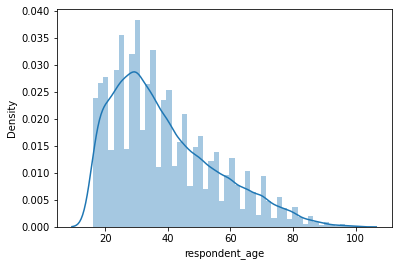

In [ ]:
# Histogram showing the age of the respondents 
# Display hist
sns.distplot(FinancialDataset['respondent_age'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


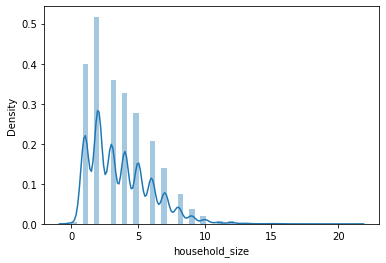

In [ ]:
sns.distplot(FinancialDataset['household_size'], kde=True)

#The graph of household_size inclined right hence the mean is larger than the median.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


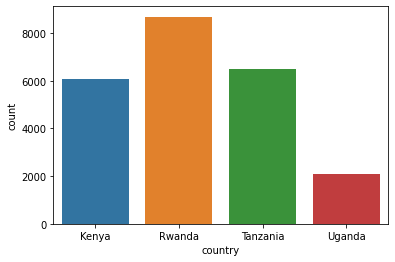

In [ ]:
sns.countplot(FinancialDataset['country'])

plt.show()
# The Country with the foremost records within the dataset is Rwanda. Uganda on the other hand has the smallest amount of records 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency/count of individuals')

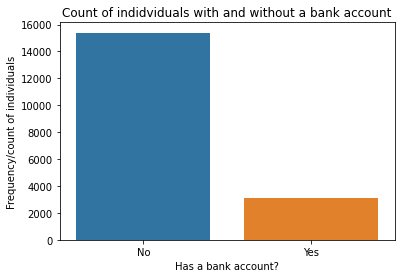

In [ ]:
# No. of individuals who have or do not have bank accounts?
# 
# plot a count plot for the variable
ax = sns.countplot(df['has_a_bank_account'], order = df['has_a_bank_account'].value_counts().index)
# formatting and labelling axes
plt.title('Count of indidviduals with and without a bank account')
plt.xlabel('Has a bank account?')
plt.ylabel('Frequency/count of individuals')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Rural    11293
Urban     7175
Name: type_of_location, dtype: int64

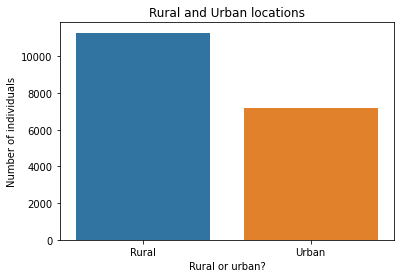

In [ ]:
# Type of location
ax = sns.countplot(df['type_of_location'], order = df['type_of_location'].value_counts().index)
# formatting the plot, labelling axes
plt.title("Rural and Urban locations")
plt.xlabel('Rural or urban?')
plt.ylabel('Number of individuals')
# frequency table of the same for comparison
df['type_of_location'].value_counts()
# It can be observed that the dataset contains additional data collected from people staying in rural areas than 
# from people staying in urban areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of individuals')

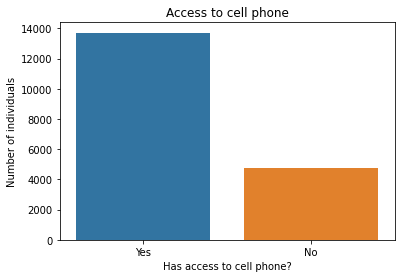

In [ ]:
# Access to cell phones by individual respondent
ax = sns.countplot(df['cell_phone_access'], order = df['cell_phone_access'].value_counts().index)
# formatting and labelling the plot
plt.title('Access to cell phone')
plt.xlabel('Has access to cell phone?')
plt.ylabel('Number of individuals')
# The number of people that have access to cell phone is almost twice the number of those that do not have 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency distribution across the population')

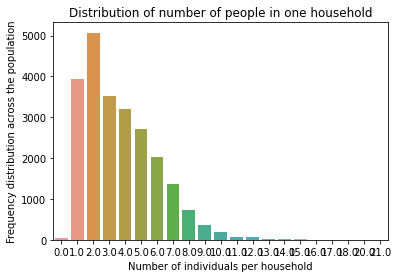

In [ ]:
# Number of people living in one household
sns.countplot(FinancialDataset['household_size'])
# formatting and labelling chart
plt.title('Distribution of number of people in one household')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')
#Majority of the people have households of 1,2,3 or 4 members 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

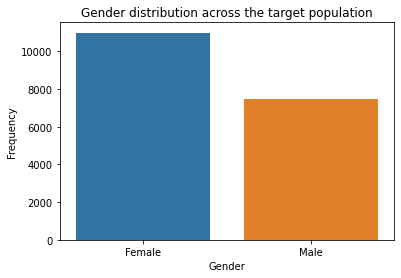

In [ ]:
# Gender of the respondent
ax = sns.countplot(df['gender_of_respondent'], order = df['gender_of_respondent'].value_counts().index)
# formatting and labelling the plot
plt.title("Gender distribution across the target population")
plt.xlabel("Gender")
plt.ylabel("Frequency")
# More females responded than males 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

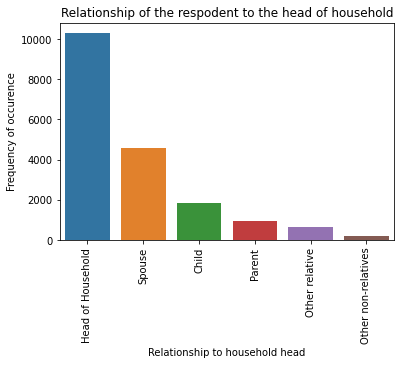

In [ ]:
# Relationship of the respondent to the head of the household
ax = sns.countplot(df['the_relathip_with_head'], order = df['the_relathip_with_head'].value_counts().index)
# formatting and labelling the chart
plt.title("Relationship of the respodent to the head of household")
plt.xlabel("Relationship to household head")
plt.ylabel("Frequency of occurence")
plt.xticks(rotation = 90)
# The survey was mostly responded to by the head of the household

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency/number of occurrences')

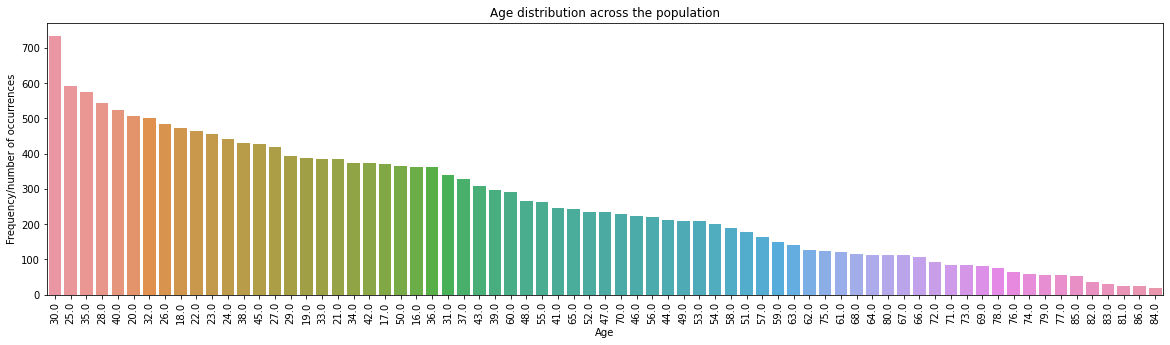

In [ ]:
# plot age distribution of the respondents
# size of the figure 
plt.figure(figsize=(20,5))

ax = sns.countplot(df['respondent_age'], order = df['respondent_age'].value_counts().index)
# formatting and labelling the chart
plt.xticks(rotation = 90)
plt.title("Age distribution across the population")
plt.xlabel("Age")
plt.ylabel("Frequency/number of occurrences")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

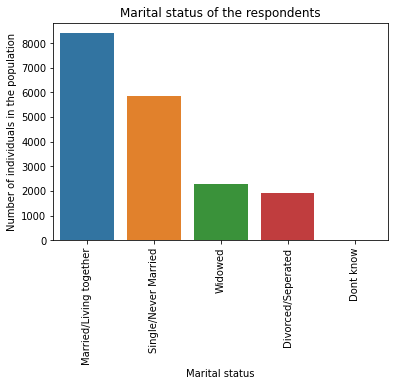

In [ ]:
# plot of the marital status of the respondents,then order them in descending order
ax = sns.countplot(df['marital_status'], order = df['marital_status'].value_counts().index)
# formatting the chart and labelling axes
plt.title("Marital status of the respondents")
plt.xlabel("Marital status")
plt.ylabel("Number of individuals in the population")
plt.xticks(rotation=90)
# Most of the respondents were married/living together 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

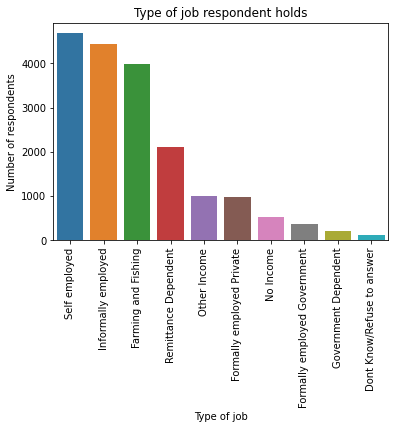

In [ ]:
# count plot for the type of job
ax = sns.countplot(df['type_of_job'], order = df['type_of_job'].value_counts().index)
# formatting and labelling the chart 
plt.title("Type of job respondent holds")
plt.xlabel("Type of job")
plt.ylabel("Number of respondents")
plt.xticks(rotation=90)
#Most of the respondents are self employed and in informal employment 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

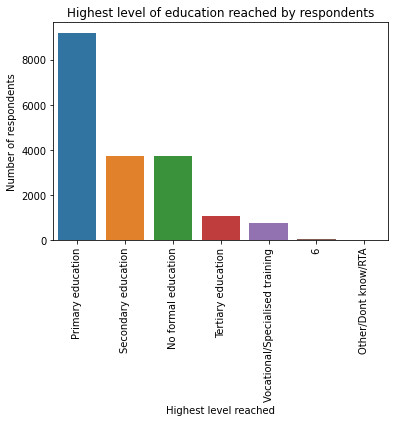

In [ ]:
# chart for the level of education 
ax = sns.countplot(df['level_of_educuation'], order = df['level_of_educuation'].value_counts().index)
df = df[~(df['level_of_educuation']=='6')]
df['level_of_educuation'].value_counts()
# Done to remove the anamoly realized when the chart was plotted
# formatting and labelling the chart
plt.title("Highest level of education reached by respondents")
plt.xlabel("Highest level reached")
plt.ylabel("Number of respondents")
plt.xticks(rotation=90)
# Majority of the respondents had primary education as their highest level of education 

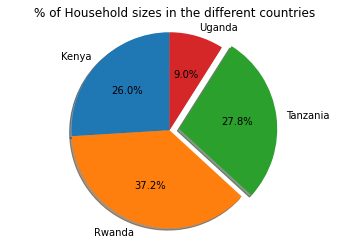

In [ ]:
household =FinancialDataset.groupby('country')['household_size'].count()
# Distribution of household sizes by count with country
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [household['Kenya'], household['Rwanda'],household['Tanzania'], household['Uganda']]
explode = [0, 0, 0.1, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()
# Rwanda had the highest number of household sizes followed by Tanzania

Bivariate Analysis



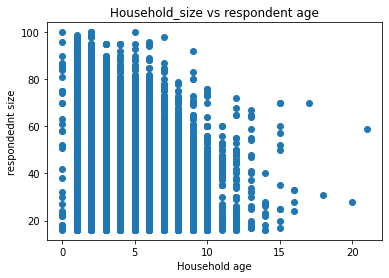

In [ ]:
#Plotting scatterplot to compare the variables
plt.scatter(FinancialDataset['household_size'],FinancialDataset['respondent_age'])

#Title
plt.title('Household_size vs respondent age')
#labelling x axis
plt.xlabel('Household age')
plt.ylabel('respondednt size')

plt.show()

# The graph is inclined to the left which means that its one tail inclined to the left with a left distribution.
# The variables are likely to have a negative linear correlation

In [ ]:
"""
Correlation
This will be used to check the strength of the variables in terms of relationship
The pearson correlation coefficient will be used to determine the relationship between the respondents age and the household size
"""
p_coeff = FinancialDataset["respondent_age"].corr(FinancialDataset["household_size"], method="pearson") 
print(p_coeff)

# Checking whether you have to define the pearson
coeff = FinancialDataset["respondent_age"].corr(FinancialDataset["household_size"]) 
print(coeff)
"""
Correlation coefficients between -0.20 and 0.20 are generally considered weak, 
A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
and indicates that both variables(respondent age and household size)  are known to move in the opposite direction. 
-0.1197
There is a very weak negative correlation matrix between the two variables and hence will not be considered important.
"""

-0.11970919507762415
-0.11970919507762415


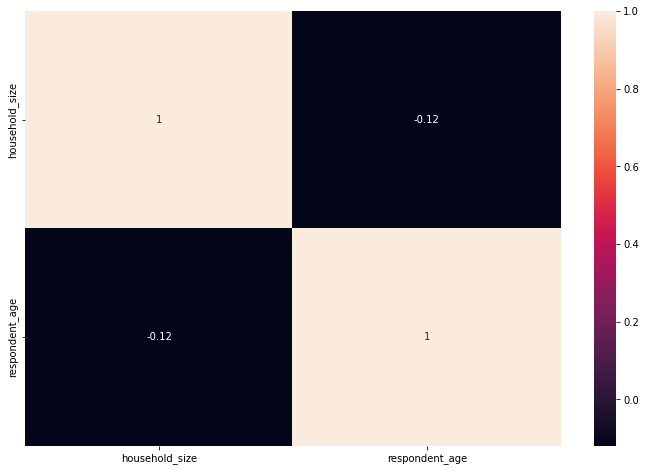

In [ ]:
plt.figure(figsize=(12, 8))
FinancialDataset_corr = FinancialDataset.corr()
sns.heatmap(FinancialDataset_corr, 
            xticklabels = FinancialDataset_corr.columns.values,
            yticklabels = FinancialDataset_corr.columns.values,
            annot = True);

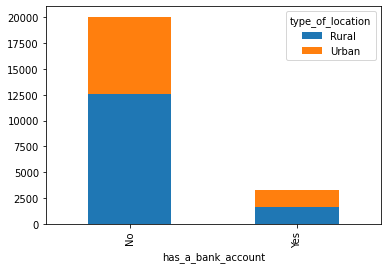

In [ ]:
#Stacked bar plot with two-level group byPermalink

FinancialDataset.groupby(['has_a_bank_account','type_of_location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
# From the stacked bar chart individuals with no bank accounts in the rural area were more than those in the urban areas
# For those that have bank acoounts the number appears to be the same for both.

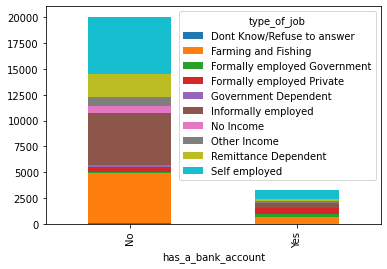

In [ ]:
FinancialDataset.groupby(['has_a_bank_account','type_of_job']).size().unstack().plot(kind='bar',stacked=True)

plt.show()

#Many of those who had bank accounts were farmers/fishers and self employmed
#Most of those who had checking account were self employed, formally and those doing farming and fishing
#It is worth noting that individuals that are formally employed private, self employed and in fishing and farming business were nearly equal
#in terms of having a bank account.
#Inaddition based on the type of job ,those who were  self employed,farmers and fishermen as well as those with remittance dependent
#took a bigger proportion of those who did not have bank accounts.


has_a_bank_account    No   Yes
country                       
Kenya               4544  1520
Rwanda              7687   997
Tanzania            5901   599
Uganda              1914   181


Text(0, 0.5, 'Distribution across the population')

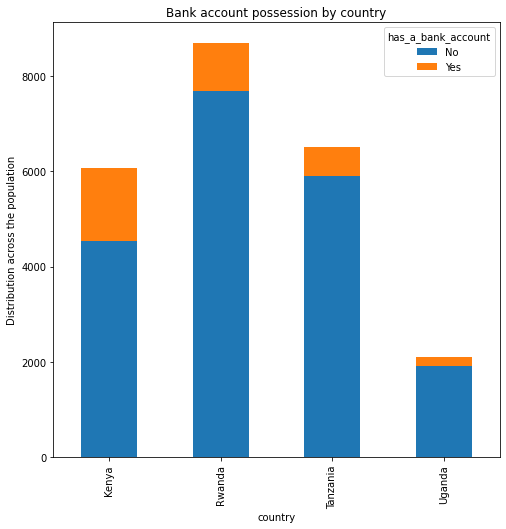

In [ ]:
# create a crosstab/frequency table for the countries and bank account possession
countries_bankacc= pd.crosstab(index=FinancialDataset['country'], columns=FinancialDataset['has_a_bank_account'])

print(countries_bankacc)
# plot chart for the frequencies represented in the crosstab dataframe 
countries_bankacc.plot(kind="bar", figsize=(8,8),stacked=True)
# labelling axes and formatting chart
plt.title("Bank account possession by country")
plt.ylabel("Distribution across the population")
# From the graph below Kenya has the most number of people with bank accounts while Uganda has the least 
# Overall the number of those without bank accounts exceeded those that have

has_a_bank_account                  No   Yes
level_of_educuation                         
6                                   22     5
No formal education               4291   176
Other/Dont know/RTA                  2     6
Primary education                11606  1083
Secondary education               3226   981
Tertiary education                 554   590
Vocational/Specialised training    345   456


Text(0, 0.5, 'Distribution across the population')

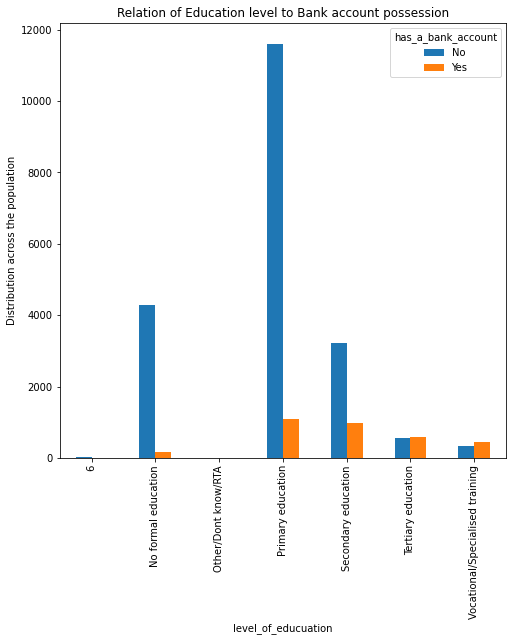

In [ ]:
"""
Demographic analysis
Here we check the relationship of the level of education and the possesion of a bank account 
"""
# create crosstab
edu_bank = pd.crosstab(index=FinancialDataset['level_of_educuation'], columns=FinancialDataset['has_a_bank_account'])
print(edu_bank)
# plot chart
edu_bank.plot(kind="bar", figsize=(8,8))
# format & label chart
plt.title("Relation of Education level to Bank account possession")
plt.ylabel("Distribution across the population")
# From the graph it can be deduced that the level of education influences an individual to have a bank account. And the more specialized 
# the education the more likelihood of one having a bank account. At the Vocational and Tertiary education the number of those having 
# bank accounts exceed those that do not have. 

has_a_bank_account   No  Yes
respondent_age              
16.0                455    5
17.0                464   10
18.0                562   21
19.0                438   28
20.0                586   36
...                 ...  ...
96.0                  3    0
97.0                  1    0
98.0                  6    0
99.0                  2    0
100.0                 5    0

[85 rows x 2 columns]


Text(0, 0.5, 'Distribution across the population')

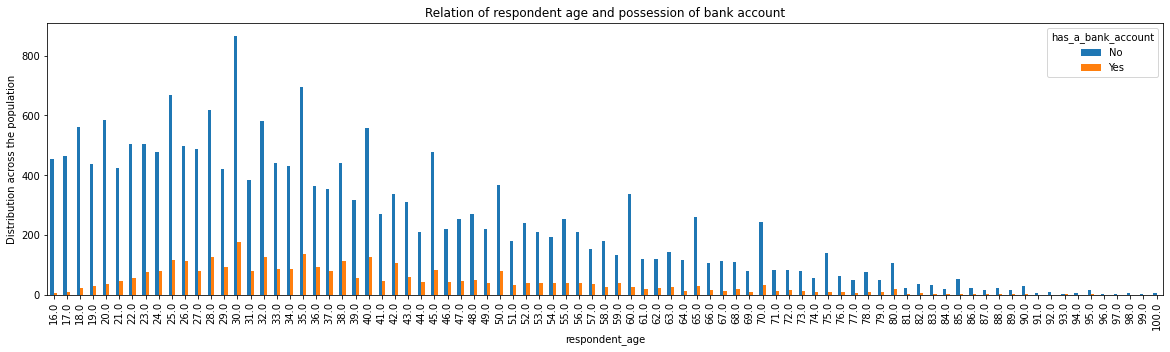

In [ ]:
# Age and Bank Account 
# create crosstab dataframe
age_bank = pd.crosstab(index=FinancialDataset['respondent_age'], columns=FinancialDataset['has_a_bank_account'])
print(age_bank)
# plot chart
age_bank.plot(kind="bar", figsize=(20,5))
# format and label chart
plt.title("Relation of respondent age and possession of bank account")
plt.ylabel("Distribution across the population")
# The greatest spread of the age set that has a bank account is between 22 years to 50 years.  

has_a_bank_account       No   Yes
gender_of_respondent             
Female                12287  1480
Male                   7759  1817


Text(0, 0.5, 'Distribution across the population')

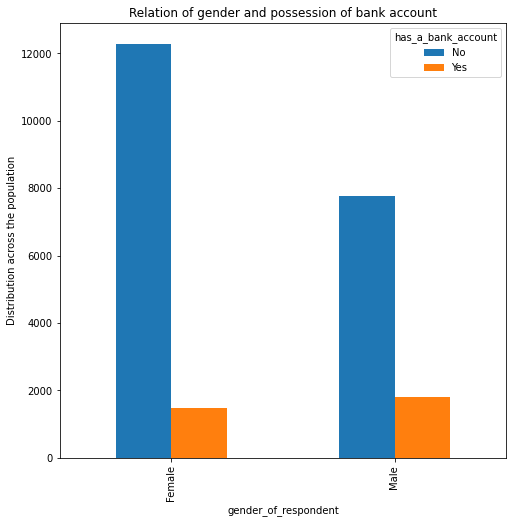

In [ ]:
# Gender and Possession of Bank Account 
# create crosstab dataframe
gender_bank = pd.crosstab(index=FinancialDataset['gender_of_respondent'], columns=FinancialDataset['has_a_bank_account'])
print(gender_bank)
# plot of the relation of gender to individuals possession to bank account
gender_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling chart
plt.title("Relation of gender and possession of bank account")
plt.ylabel("Distribution across the population")
# From the respondents most male have bank accounts than female. 

has_a_bank_account         No   Yes
marital_status                     
Divorced/Seperated       1817   232
Dont know                   6     2
Married/Living together  8839  1861
Single/Never Married     6944   959
Widowed                  2440   243


Text(0, 0.5, 'Distribution across the population')

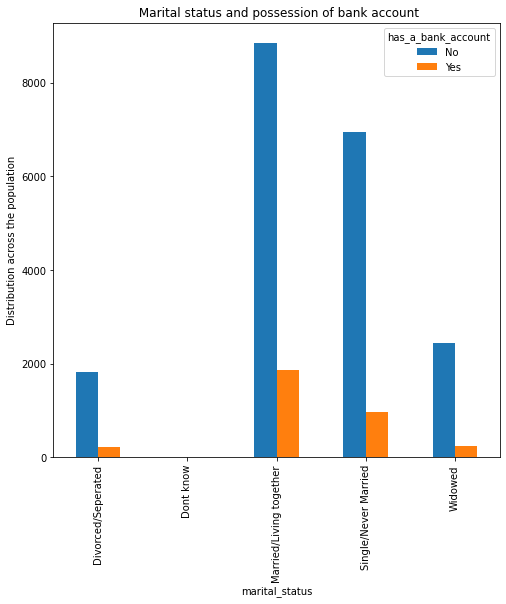

In [ ]:
# Marital Status and Bank Account 
# create crosstab dataframe
marital_bank = pd.crosstab(index=FinancialDataset['marital_status'], columns=FinancialDataset['has_a_bank_account'])
print(marital_bank)
# plot chart
marital_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling
plt.title(" Marital status and possession of bank account")
plt.ylabel("Distribution across the population")
# Most of the respondents that are married or living together have bank accounts with the divorced or separated being the least with 
# bank accounts 

has_a_bank_account              No  Yes
type_of_job                            
Dont Know/Refuse to answer     111   14
Farming and Fishing           4788  634
Formally employed Government    87  299
Formally employed Private      481  567
Government Dependent           197   50
Informally employed           5110  440
No Income                      605   13
Other Income                   881  196
Remittance Dependent          2269  240
Self employed                 5517  844


Text(0, 0.5, 'Distribution across the population')

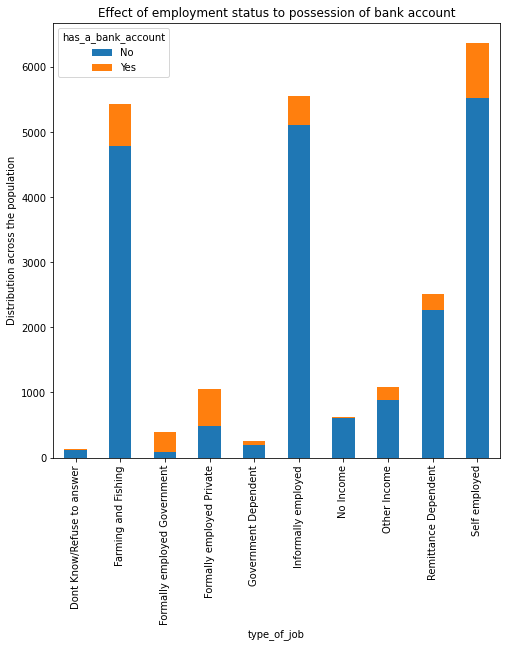

In [ ]:
# Effect on employment status on having a bank account
# create crosstab dataframe
employ_bank = pd.crosstab(index=FinancialDataset['type_of_job'], columns=FinancialDataset['has_a_bank_account'])
print(employ_bank)
# plot chart from the dataframe
employ_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# labelling chart
plt.title("Effect of employment status to possession of bank account")
plt.ylabel("Distribution across the population")
# A significant number of individuals that are self employed, do fishing and farming, and those that are formally employed 
# in private companies do have bank accounts 

has_a_bank_account     No   Yes
type_of_location               
Rural               12601  1663
Urban                7445  1634


Text(0, 0.5, 'Distribution across the population')

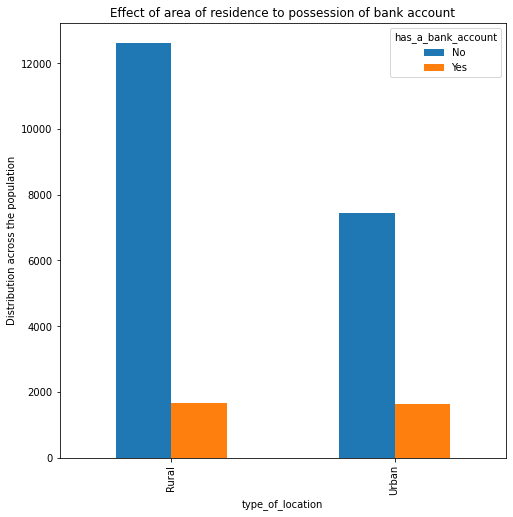

In [ ]:
# Location and Bank Account 
# create crosstab dataframe
location_bank = pd.crosstab(index=FinancialDataset['type_of_location'], columns=FinancialDataset['has_a_bank_account'])
print(location_bank)
# plot chart
location_bank.plot(kind="bar", figsize=(8,8))
# label chart
plt.title("Effect of area of residence to possession of bank account")
plt.ylabel("Distribution across the population")
# The area of location it appears does not influence the possession of a bank account 

has_a_bank_account    No  Yes
household_size               
0.0                   35    1
1.0                 3257  671
2.0                 4445  627
3.0                 3011  503
4.0                 2728  472
5.0                 2304  412
6.0                 1761  268
7.0                 1201  177
8.0                  655   85
9.0                  318   36
10.0                 166   25
11.0                  60    6
12.0                  59    7
13.0                  23    2
14.0                   7    2
15.0                   9    2
16.0                   4    0
17.0                   0    1
18.0                   1    0
20.0                   1    0
21.0                   1    0


Text(0, 0.5, 'Distribution across the population')

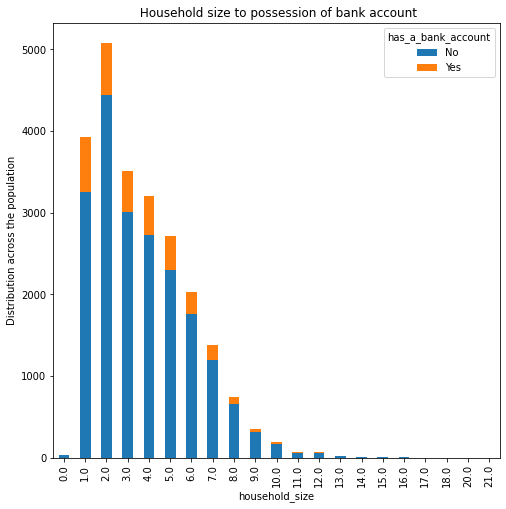

In [ ]:
# Household size and Possession of Bank Account 
# create crosstab dataframe
housesize_bank = pd.crosstab(index=FinancialDataset['household_size'], columns=FinancialDataset['has_a_bank_account'])
print(housesize_bank)
# plot chart
housesize_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title(" Household size to possession of bank account")
plt.ylabel("Distribution across the population")
# The spread of the people with bank accounts is mostly with households that are between 1 to 5 

has_a_bank_account     No   Yes
cell_phone_access              
No                   5905   104
Yes                 14141  3193


Text(0, 0.5, 'Distribution across the population')

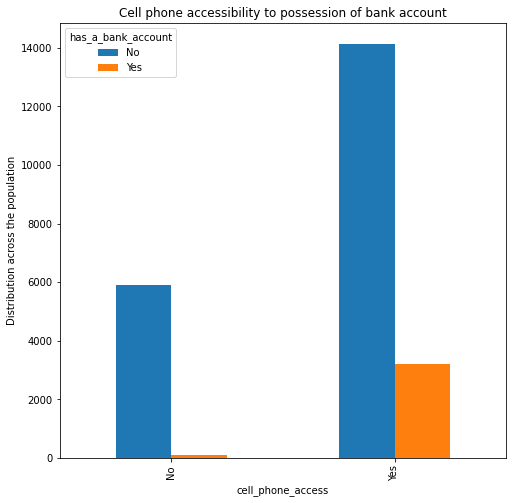

In [ ]:
# Cellphone accessibilty and Bank Account 
# create crosstab dataframe
cellphone_bank = pd.crosstab(index=FinancialDataset['cell_phone_access'], columns=FinancialDataset['has_a_bank_account'])
print(cellphone_bank)
# plot chart
cellphone_bank.plot(kind="bar", figsize=(8,8))
# labelling chart
plt.title("Cell phone accessibility to possession of bank account")
plt.ylabel("Distribution across the population")
# Those individuals with cellphone accesibility appear to the most with bank accounts 

has_a_bank_account         No   Yes
the_relathip_with_head             
Child                    2028   193
Head of Household       10471  2259
Other non-relatives       169    20
Other relative            598    65
Parent                   1004    65
Spouse                   5776   695


Text(0, 0.5, 'Distribution across the population')

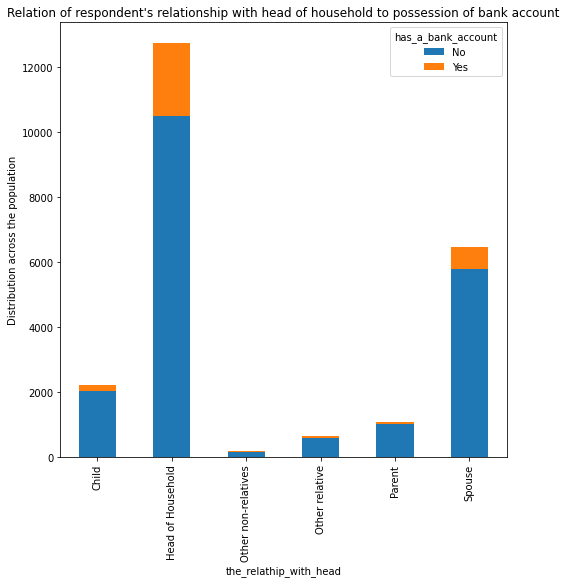

In [ ]:
# Head of household relationship and Bank Account 
# create crosstab dataframe
relation_withhead_bank = pd.crosstab(index=FinancialDataset['the_relathip_with_head'], columns=FinancialDataset['has_a_bank_account'])
print(relation_withhead_bank)
# plot chart
relation_withhead_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Relation of respondent's relationship with head of household to possession of bank account")
plt.ylabel("Distribution across the population")
# Most of the respondents with a relationship with the head of the household have bank accounts followed by those with a relationship 
# with the spouse 

Multi- Variate Analysis 

For this analysis, the Principle Component Analysis will be used since it calculates an uncorrelated set of variables known as principal components. They are then ordered so that the first few retain most of the variation present in all the original variables 


In [ ]:
# Since PCA deals with numerical values, there is need to change the categorical values into numerical data for analysis
# Creating dummy variables to perform PCA with all associated variable 

     

In [ ]:
#Preprocessing
#Dividing the features into the feature set and corresponding labels: X and y respectively.
X = FinancialDataset.drop('has_a_bank_account', axis = 1)
y = FinancialDataset.iloc[:, 2]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
# Splitting the dataset into training and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
 # Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#To establish the variance caused by each of the principle components 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00511689e-01, 7.43240561e-02, 7.06662394e-02, 5.33472167e-02,
       5.16174483e-02, 4.46360668e-02, 4.12703943e-02, 3.62989264e-02,
       3.32010133e-02, 3.22769539e-02, 3.03331598e-02, 2.71748377e-02,
       2.70411694e-02, 2.57420089e-02, 2.56077511e-02, 2.52872934e-02,
       2.49747055e-02, 2.48079311e-02, 2.45012277e-02, 2.44189907e-02,
       2.42870816e-02, 2.38726805e-02, 2.25133440e-02, 2.10849729e-02,
       2.00826731e-02, 1.95180795e-02, 1.57888370e-02, 1.33313054e-02,
       1.17535221e-02, 1.11941927e-02, 9.55712430e-03, 8.97710745e-03,
       1.98224355e-32, 5.43752389e-33, 4.76912871e-33, 3.02401926e-33,
       1.81528133e-33, 8.09102235e-34, 5.61668666e-34, 2.23012042e-35])

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[2291  560]
 [ 198 1620]]
Accuracy 0.8376526022702935


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2484  367]
 [ 473 1345]]
0.8200899550224887


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print('The confusion matrix is',confusion_matrix(y_test, y_pred))
print('\n')
print('The accuracy score is',accuracy_score(y_test, y_pred))
print('\n')

#Explained Variance Ratio
print(pca.explained_variance_ratio_)

The confusion matrix is [[3631    0]
 [   0 2205]]


The accuracy score is 1.0


[1.01373448e-01 7.42465982e-02 7.05096998e-02 5.28932776e-02
 5.16799012e-02 4.46125320e-02 4.08608330e-02 3.65090926e-02
 3.35256021e-02 3.22731339e-02 3.06716214e-02 2.70799837e-02
 2.69261129e-02 2.57917081e-02 2.56253025e-02 2.53226225e-02
 2.49583400e-02 2.48824780e-02 2.46013465e-02 2.44468815e-02
 2.41809764e-02 2.37086671e-02 2.24727783e-02 2.09107986e-02
 2.00347115e-02 1.95306241e-02 1.56833292e-02 1.35166104e-02
 1.16184791e-02 1.11437711e-02 9.48582037e-03 8.92291853e-03
 1.99923874e-32 4.17428998e-33 3.11190354e-33 2.60063434e-33
 2.13540649e-33 5.61962294e-34 2.43602654e-34 1.61784690e-34]


In [ ]:

len(X.columns)

40

In [ ]:
import warnings
warnings.filterwarnings("ignore")

accuracy = []

for i in range(1, 40):

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  
  accuracy.append(accuracy_score(y_test, y_pred))

#print(confusion_matrix(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))
#print(pca.explained_variance_ratio_)'''

accuracy

[0.8154557916381083,
 0.8300205620287868,
 0.8212816997943797,
 0.842871830020562,
 0.907128169979438,
 0.9014736120630569,
 0.9261480466072652,
 0.9156956819739548,
 0.9275188485263879,
 0.9381425633995888,
 0.9835503769705277,
 0.9813228238519534,
 0.9952021932830706,
 0.9953735435229609,
 0.9972583961617546,
 0.997943797121316,
 0.9982864976010967,
 0.997943797121316,
 0.9993145990404386,
 0.9998286497601097,
 0.9998286497601097,
 0.9996572995202193,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

From the above we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. The accuracy achieved for the feature set is 83.77% with one principal component and 82% with more. 

Summary of Findings

Univariate analysis

- A huge population of the respondents in the four countries did not have or use a bank account.
- Most individuals live in rural areas
- The most popular family/household size is 2
a huge number of the respondents are of age 30, while the mean of the ages of all respondents was 39.
- A large population of the respondents were female.
- Most of the respondents were heads of the household, followed by spouses.
- Most respondents in the population were married and the next most highest were single individuals who had bank accounts.
- Most respondents had only studied upto primary level of education. 
- A huge number of the respondent population were self-employed

Bivariate analysis:

- Rwanda recorded a huge number of individuals without a bank account. Kenya however, recorded a relatively high number of individuals possessing a bank account.
- The distribution of accessibility to cell phone was fairly distributed across the countries with Tanzania having a relatively huge population with no access to a cell phone
- Most respondents from Tanzania reside in urban areas, while in Rwanda a huge population live in rural areas
- In Tanzania, most respondents live in household sizes of 1 or 2 people
- Most respondents in Kenya, Rwanda and Uganda are married while in 
- Uganda, a huge population are single/never married
- A huge population of the respondents from Kenya and Rwanda do farming and fishing as their income source, while in Uganda and Tanzania,a huge population are self-employed
- Most individuals who had gone through higher education i.e. tertiary level or vocational training, have/use a bank account, hence the bars are almost equal
- A huge population of individuals of ages 30, 35, 40, 42 had bank accounts
- As much as females dominated the respondents population, males who have/use a bank account were relatively more than the females